**Submitted By,** <br> 
Name: Anshara Chowdhury <br>
ID: 2021768 <br>
Name: Fahim Shahriar Eram <br>
ID: 2022523

KMeans Clustering

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pandas.plotting import parallel_coordinates
import plotly.express as px
from mlxtend.preprocessing import MeanCenterer
import random

This is the pseudocode tolad Load data from file and save in the numpy matrix. 
You can use panda to read the dataset in to numpy matrix. data matrix will have data points. First column is point index. Rest of the columns have features.  ClassLabel has the labels.

In [91]:
def load(file_name):
    data = [] 
    classLabel = []             
    fh = open(file_name)
    for line in fh:
        line = line.strip()
        if not line:
            continue
        line = line.split(',')
        temp = []
        for feature in line[0:-2]:
            temp.append(float(feature))
        classLabel.append(line[-1])
        data.append(temp)
    data = np.array(data)
    return data, classLabel

Simple centroid initialization function

In [92]:
def initialize_centroids_simple(data, dimension, k):
    centroids = np.array([[0 for _ in range(dimension)] for _ in range(k)])
    random_numbers = random.sample(range(0, data.shape[0]), k)
    selected_rows = data[random_numbers]
    centroids = selected_rows
    return centroids

Calculate eucledian distance

In [93]:
def get_euclidean_distance(p1, p2):
    distance = np.sqrt(np.sum((p1 - p2) ** 2))
    return distance

Calculate the squared difference from a data point to a centroid

In [94]:
def minimum_squared_difference(p1, p2):
    distance = np.sum((p1 - p2) ** 2)
    return distance

KMeans Function


In [95]:
def kmeans(data, dimension, k):
    N = np.size(data, 0)
    centroids = initialize_centroids_simple(data, dimension, k)
    cluster_affiliation = np.array([-1 for _ in range(0, N)])
    jPrev = 0
    j = 0
    flag = 1
    while flag:
        for i, point in enumerate(data):
        
            min_distance = float('inf')
            minSquaredDifference1 = float('inf')
            min_distance_index = None
    
            for cluster_index, centroid in enumerate(centroids):
                distance = get_euclidean_distance(centroid, point)
                if distance < min_distance:
                    min_distance = distance
                    min_distance_index = cluster_index

                if cluster_affiliation[i] != min_distance_index:
                    cluster_affiliation[i] = min_distance_index
                
                squaredDifference1 = minimum_squared_difference(centroid, point)
                if squaredDifference1 < minSquaredDifference1:
                    minSquaredDifference1 = squaredDifference1
            
            jPrev += minSquaredDifference1
        jPrev /= N

        centroids = np.array([[0 for _ in range(dimension)] for _ in range(k)], dtype=np.float64)
        clutser_point_count = np.array([0 for _ in range(k)])
        unique_clusters = np.unique(cluster_affiliation)
        
        occurrences = []
        indexes_list = []
        for num in unique_clusters:
            indexes = np.where(cluster_affiliation == num)[0]
            count = np.sum(cluster_affiliation == num)
            occurrences.append(count)
            indexes_list.append(indexes)
        clutser_point_count = occurrences

        for i, sublist in enumerate(indexes_list):
            for element in sublist:
                datapoints = data[element]
                centroids[i] += datapoints
            centroids[i] /= clutser_point_count[i]

        for i, point in enumerate(data):
            minSquaredDifference2 = float('inf')
            for cluster_index, centroid in enumerate(centroids):
                squaredDifference2 = minimum_squared_difference(centroid, point)
                if squaredDifference2 < minSquaredDifference2:
                    minSquaredDifference2 = squaredDifference2

            j += minSquaredDifference2
        j /= N

        if abs(j - jPrev) <= pow(10, -5):
            flag = 0
        else:
            jPrev = 0
            j = 0
            
    return (centroids, cluster_affiliation)


3D Cluster Plot

In [96]:
def toPlot(data, cluster_affiliation):
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    myArray = []
    unique_clusters = np.unique(cluster_affiliation)
    indexes_list = []
    for num in unique_clusters:
        indexes = np.where(cluster_affiliation == num)[0]
        indexes_list.append(indexes)
   
    for sublist in indexes_list:
        for element in sublist:
            myArray.append(data[element])
            
    new_attribute = np.expand_dims(np.sort(cluster_affiliation), axis=1)
    myArray = np.concatenate((myArray, new_attribute), axis=1)
    df = pd.DataFrame(myArray)
    df.rename(columns = {0:'Sepal-Length', 1:'Sepal-Width', 2:'Petal-Length', 3:'Class', 4:'Affiliation'}, inplace = True)

    uniqueAffiliation = df['Affiliation'].unique()
    classes = df['Class'].unique()
    cluster_colors = ['blue', 'red', 'yellow']
    marker_shapes = ['s', 'o', '^']

    df['Sepal-Length'] = pd.to_numeric(df['Sepal-Length'], errors='coerce')
    df['Sepal-Width'] = pd.to_numeric(df['Sepal-Width'], errors='coerce')
    df['Petal-Length'] = pd.to_numeric(df['Petal-Length'], errors='coerce')

    for i, affiliate in enumerate(uniqueAffiliation):
        for j, class_label in enumerate(classes):
            affiliateData = df[(df['Affiliation'] == affiliate) & (df['Class'] == class_label)]
            ax.scatter(affiliateData['Sepal-Length'], affiliateData['Sepal-Width'], affiliateData['Petal-Length'], c=cluster_colors[i], marker=marker_shapes[j], label=f'Cluster {int(affiliate)}, Class {class_label}')

    ax.set_xlabel('Sepal Length')
    ax.set_ylabel('Sepal Width')
    ax.set_zlabel('Petal-Length')
    ax.set_title('K-means Clustering')
    elevation_angle = 0
    azimuthal_angle = 90
    ax.view_init(elev=elevation_angle, azim=azimuthal_angle)
    plt.legend()
    plt.show()
    

Driver funtion/Main Function

[[5.86833333 2.74       4.38166667]
 [5.006      3.418      1.464     ]
 [6.8525     3.07       5.6925    ]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


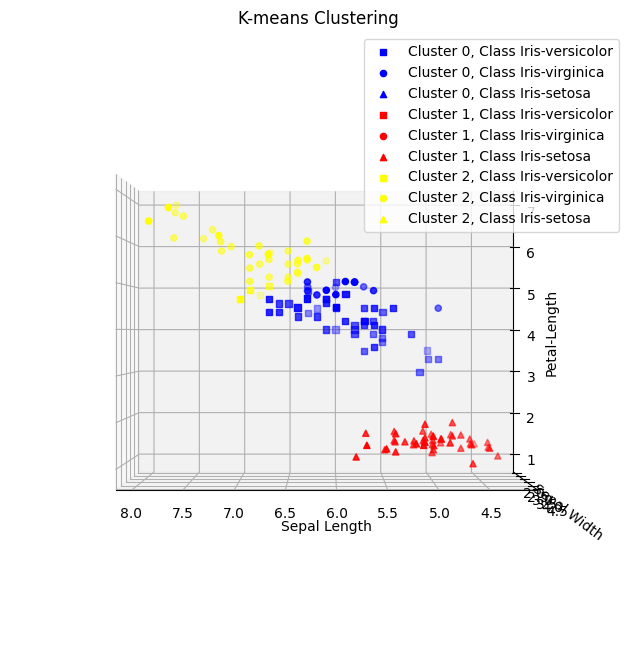

In [97]:
def main():
    K = 3
    inputfilename = "iris.data"
    data, classLabel = load(inputfilename)
    dimension = np.size(data, 1)
    centroids, cluster_affiliation = kmeans(data, dimension, K)
    print(centroids)
    print(cluster_affiliation)
    classLabel = np.array(classLabel)
    classLabel = classLabel.reshape(150, 1)
    data = np.concatenate((data, classLabel), axis=1)
    toPlot(data, cluster_affiliation)

if __name__ == "__main__":
    main()

## Visual Calculation
##### Cluster 0 represents blue color and class type 'Iris-Versicolor'. The clustering was not perfect because we can see 11 points that is from class type "Iris-Virginica".
##### Cluster 1 represents red color and class type 'Iris-Setosa'. The clustering was perfect.
##### Cluster 2 represents yellow color and class type 'Iris-Virginica'. The clustering was not perfect because we can see 11 points that is from class type "Iris-Versicolor"